In [3]:
import os
for dirname, _, filenames in os.walk('D:\data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


In [5]:
# importing libraries for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# importing libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
    
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# full display of columns and rows
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

In [7]:
df = pd.read_csv("D:\data.csv")

In [8]:
df.head()

,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,Male,0,9.47080,7.141434,6.03696,4.360278,Unknown,ENFP
1,27.0,Female,0,5.85392,6.160195,0.80552,4.221421,Sports,ESFP
2,21.0,Female,0,7.08615,3.388433,2.66188,5.127320,Unknown,ENFP
3,28.0,Male,0,2.01892,4.823624,7.30625,5.986550,Others,INTP
4,36.0,Female,1,9.91703,4.755080,5.31469,4.677213,Technology,ENFP


In [9]:
# Dataframe summary

def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['Data Type'])
    summ['Missing#'] = df.isna().sum()
    summ['Missing%'] = (df.isna().sum())/len(df)
    summ['Dups'] = df.duplicated().sum()
    summ['Uniques'] = df.nunique().values
    summ['Count'] = df.count().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['Min'] = desc['min'].values
    summ['Max'] = desc['max'].values
    summ['Average'] = desc['mean'].values
    summ['Standard Deviation'] = desc['std'].values
    summ['First Value'] = df.loc[0].values
    summ['Second Value'] = df.loc[1].values
    summ['Third Value'] = df.loc[2].values

    display(summ)

summary(df)

data shape: (128061, 9)


,Data Type,Missing#,Missing%,Dups,Uniques,Count,Min,Max,Average,Standard Deviation,First Value,Second Value,Third Value
Age,float64,0,0.0,0,39,128061,18.0,57.0,26.349091,4.908022,19.0,27.0,21.0
Gender,object,0,0.0,0,2,128061,NaN,NaN,NaN,NaN,Male,Female,Female
Education,int64,0,0.0,0,2,128061,0.0,1.0,0.411156,0.492045,0,0,0
Introversion Score,float64,0,0.0,0,120205,128061,0.00004,9.99999,4.996387,2.888636,9.4708,5.85392,7.08615
Sensing Score,float64,0,0.0,0,128054,128061,0.0,9.788815,5.081893,1.183236,7.141434,6.160195,3.388433
Thinking Score,float64,0,0.0,0,120122,128061,0.00005,9.99997,4.98804,2.886018,6.03696,0.80552,2.66188
Judging Score,float64,0,0.0,0,127724,128061,0.0,9.840494,4.578293,1.391582,4.360278,4.221421,5.12732
Interest,object,0,0.0,0,5,128061,NaN,NaN,NaN,NaN,Unknown,Sports,Unknown
Personality,object,0,0.0,0,16,128061,NaN,NaN,NaN,NaN,ENFP,ESFP,ENFP


In [11]:
from plotly.subplots import make_subplots

# Create subplots with 2 rows and 2 columns
fig_dashboard = make_subplots(rows=2, cols=2, 
                              subplot_titles=("Introversion Score", "Sensing Score", "Thinking Score", "Judging Score"))

Introversion_Score = df.groupby('Personality')['Introversion Score'].mean().reset_index()
fig_dashboard.add_trace(px.bar(Introversion_Score, x='Personality', y='Introversion Score').data[0], row=1, col=1)

Sensing_Score = df.groupby('Personality')['Sensing Score'].mean().reset_index()
fig_dashboard.add_trace(px.bar(Sensing_Score, x='Personality', y='Sensing Score').data[0], row=1, col=2)

Thinking_Score = df.groupby('Personality')['Thinking Score'].mean().reset_index()
fig_dashboard.add_trace(px.bar(Thinking_Score, x='Personality', y='Thinking Score').data[0], row=2, col=1)

Judging_Score = df.groupby('Personality')['Judging Score'].mean().reset_index()
fig_dashboard.add_trace(px.bar(Judging_Score, x='Personality', y='Judging Score').data[0], row=2, col=2)

# Update layout for the dashboard
fig_dashboard.update_layout(height=800, width=1000, title_text="Personality vs Average Score")

fig_dashboard.show()

In [13]:
df['Personality'].value_counts()

Personality
ENFP    34404
ENTP    24718
INFP    24711
INTP    17132
ESFP     4832
ENFJ     3883
ISFP     3456
ESTP     3334
INFJ     2919
ENTJ     2783
ISTP     2390
INTJ     1920
ESFJ      554
ESTJ      392
ISFJ      371
ISTJ      262
Name: count, dtype: int64

In [14]:
# Let's manually change the 'Personality' column from string to numbers. 
# Let's do it in ascending order depending on the valore_counts of each Personality
df.replace({'Personality' : { 'ENFP' : 0, 'ENTP' : 1, 'INFP' : 2,'INTP':3,'ESFP':4,
                              'ENFJ':5, 'ISFP':6,'ESTP':7, 'INFJ':8, 'ENTJ':9,'ISTP':10,
                              'INTJ':11,'ESFJ':12,'ESTJ':13,'ISFJ':14,'ISTJ':15 }}, inplace=True)

In [15]:
# Convert the columns to numeric.
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == type(object):
        df[column] = le.fit_transform(df[column])

In [16]:
df.head()


,Age,Gender,Education,Introversion Score,Sensing Score,Thinking Score,Judging Score,Interest,Personality
0,19.0,1,0,9.47080,7.141434,6.03696,4.360278,4,0
1,27.0,0,0,5.85392,6.160195,0.80552,4.221421,2,4
2,21.0,0,0,7.08615,3.388433,2.66188,5.127320,4,0
3,28.0,1,0,2.01892,4.823624,7.30625,5.986550,1,3
4,36.0,0,1,9.91703,4.755080,5.31469,4.677213,3,0


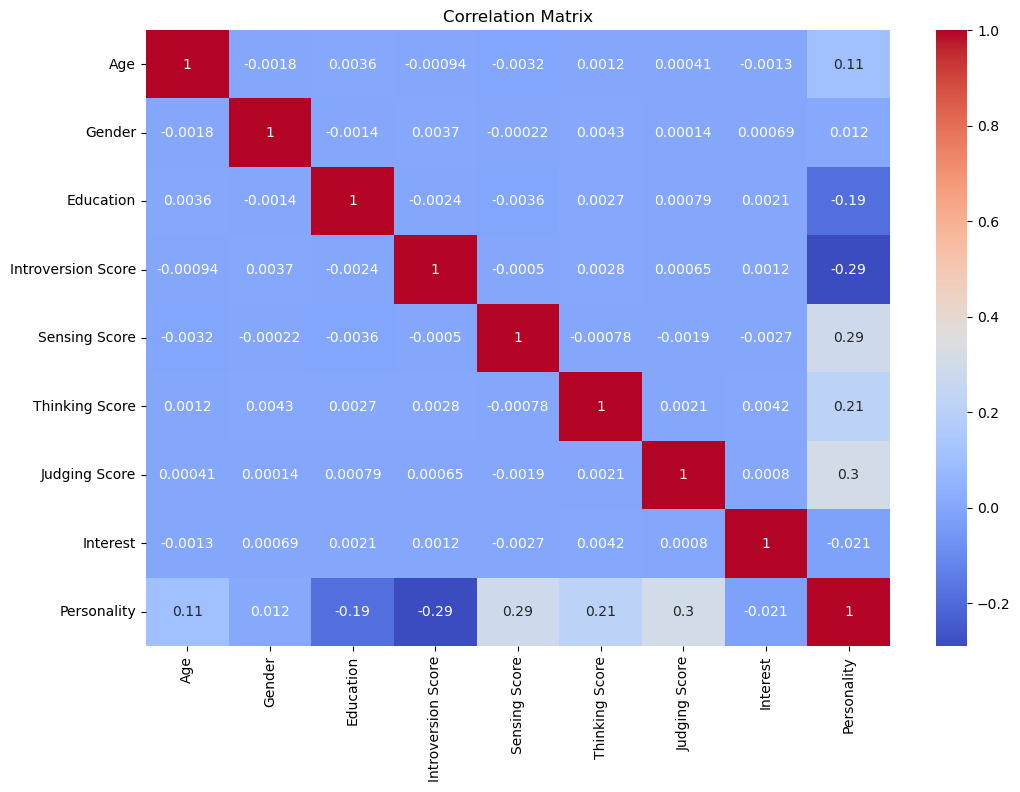

In [17]:
# Heatmap and Correlation Matrix
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()